## Installing the plot tools library

In [2]:
!pip install tensorkit_plottools

You should consider upgrading via the 'pip install --upgrade pip' command.


## Importing the necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

import ipywidgets as widgets

import plottools.fMRI.base as base
from plottools.fMRI.tile_plots import create_fmri_evolving_factor_plot, create_fmri_factor_plot

/home/marie/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
%matplotlib notebook

## We must load the data from the hard disk
We start by setting the correct paths

In [5]:
factors_path = r'/path/to/factors.mat'
maskname = r'/path/to/mask.mat'

Then, we load the factor matrices. Loading the A and C is very easy, loading the B is somewhat cumbersome since we need to construct it from the projection matrices.

In [4]:
# This is how we load the factors
factors = io.loadmat(factors_path)

# Load the factor matrices
A = factors['A']
C = factors['C']

# Construct the B matrix from the projection matrices
B_length = factors['projection_matrix_000'].shape[0]
B = np.zeros((C.shape[0], B_length, C.shape[-1]))

blueprint_B = factors['blueprint_B']
for k in range(C.shape[0]):
    B[k] = factors[f'projection_matrix_{k:03d}']@blueprint_B
    
    
print(f'A shape: {A.shape}')
print(f'B shape: {B.shape}')
print(f'C shape: {C.shape}')

A shape: (143, 2)
B shape: (14, 67446, 2)
C shape: (14, 2)


Finally, we load the mask and template to plot the images with.

In [5]:
print(f'Loading mask and template')
mask = base.load_mask(maskname)
template = base.load_template()
image_width, image_height, num_slices = mask.shape
print(f'Width: {image_width}, height: {image_height}, no. slices: {num_slices}')

Loading mask and template
Width: 53, height: 63, no. slices: 46


## Now, we can construct the images from the factor 


In [18]:
B_images = [base.get_fMRI_images(B_r, mask, axis=0) for B_r in B.T]
B_images = np.ma.array(B_images)

print(f'Image shape: {B_images[0].shape}')

Image shape: (53, 63, 46, 14)


To get the image for component 1, write `B_images[0]`, likewise, for component 2, write `b_images[1]`

## Finally, we can start to plot the factors

First, we choose which slices to show.

In [20]:
slice_idx = np.linspace(num_slices-1, 0, 12, dtype=np.int)

print(f'Displaying slices: {slice_idx}')

Displaying slices: [45 40 36 32 28 24 20 16 12  8  4  0]


Then, we can make a series of time-plots

In [22]:
create_fmri_evolving_factor_plot?

<IPython.core.display.Javascript object>


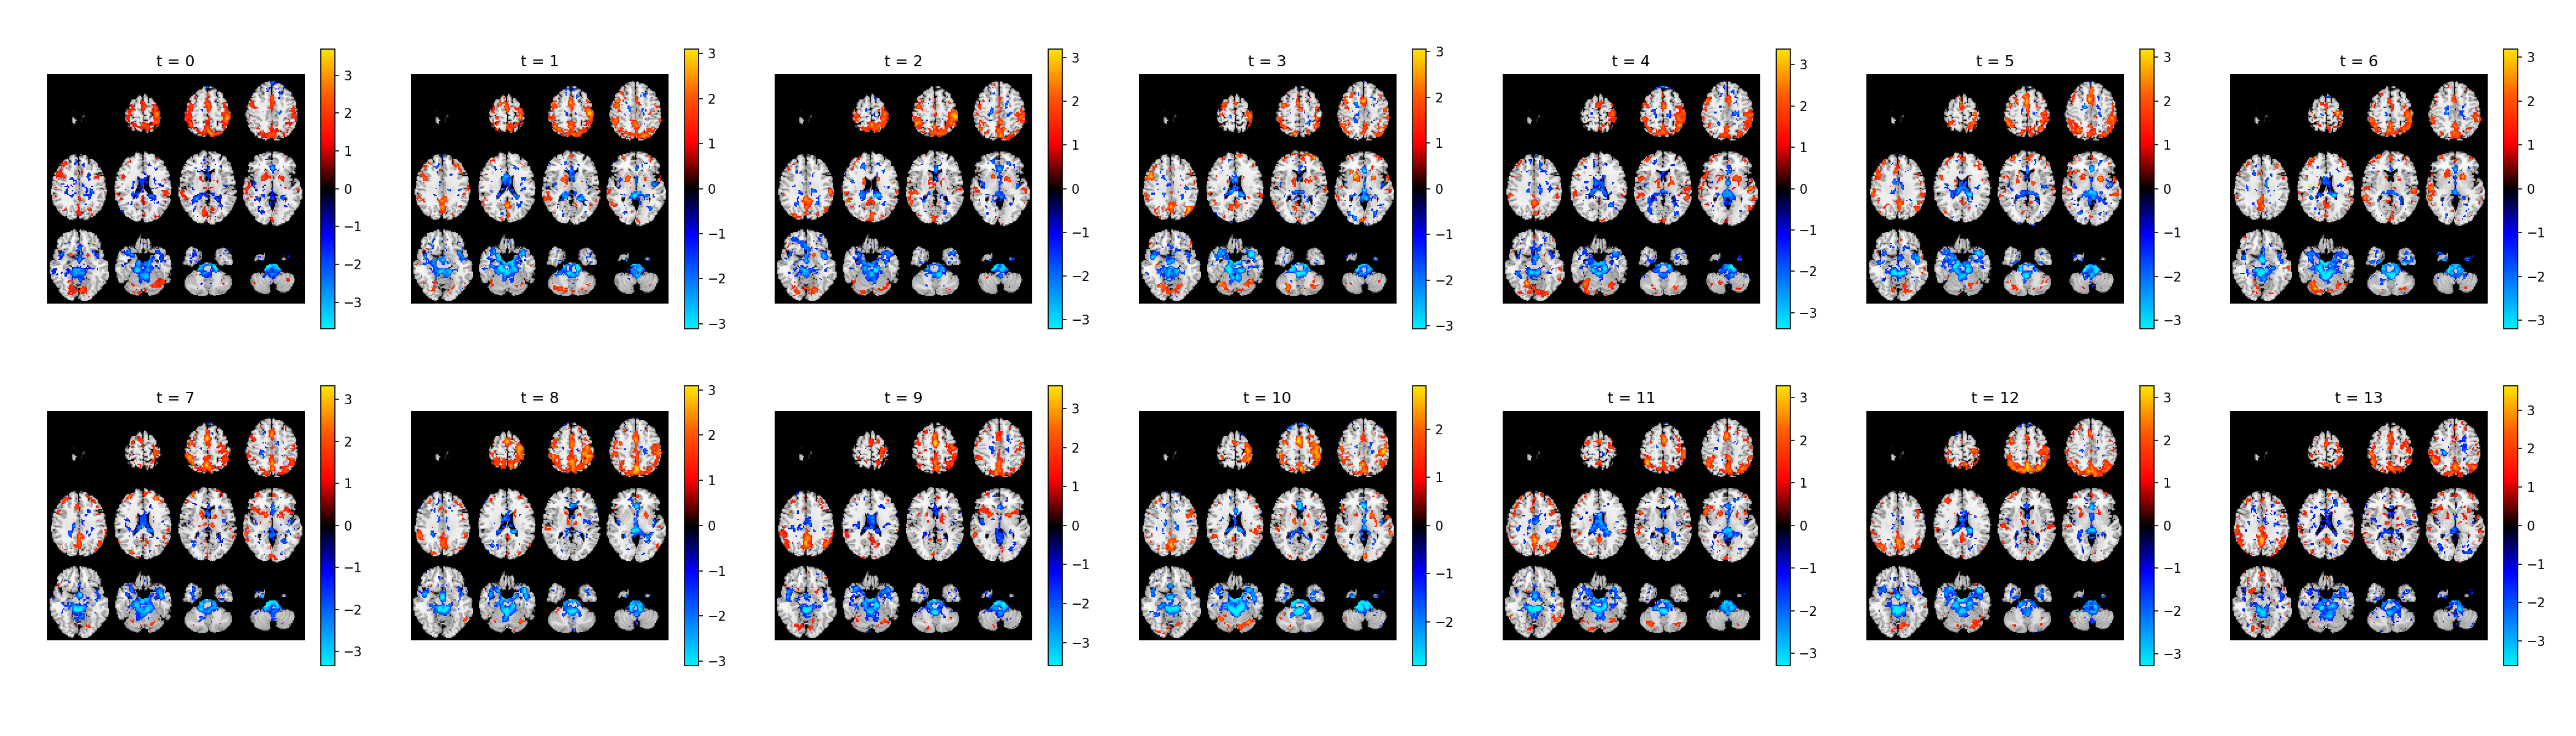

In [24]:
fig, axes = create_fmri_evolving_factor_plot(
    B_images[0], # The 4D time image, time on last axis, slices on second to last axis
    template, # The 3D brain template to plot the components onto
    cmap=base.maryland_cmap, # Which colourmap to use, can be any matplotlib colourmap
    num_rows=2, # Number of time-rows in the visualisation
    num_cols=7, # Number of time-columns in the visualisation
    # num_rows*num_cols must be greater than the number of time-steps
    
    num_tile_cols=4,  # Number of slice rows to use
    num_tile_rows=3,  # Number of slice columns to use
    slice_idx=slice_idx,  # Which slices to show
    # the length of slice_idx must be equal to num_tile_cols*num_tile_rows
    
    zscore=True, # Whether or not to z-score the components
    threshold=1.3  # What threshold to use
)

We can also create a plot with only one time-step

<IPython.core.display.Javascript object>


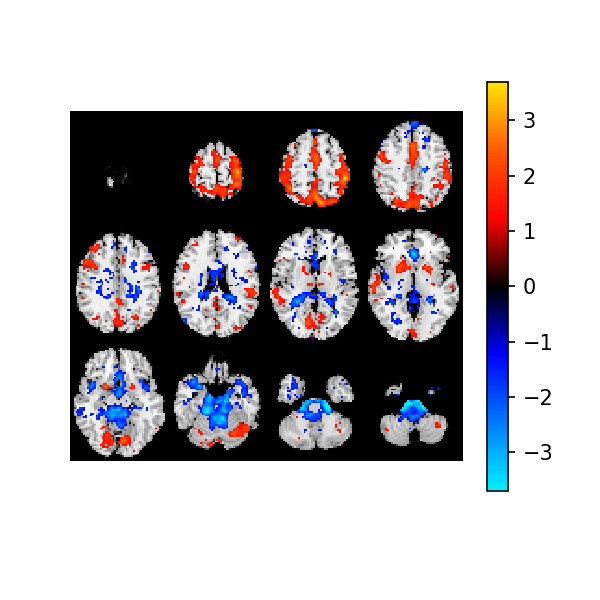

In [25]:
ax = create_fmri_factor_plot(
    B_images[0][...,0],  # 3D image, slice on last axis
    template, # The 3D brain template to plot the components onto
    cmap=base.maryland_cmap, # Which colourmap to use, can be any matplotlib colourmap
    
    num_tile_cols=4,  # Number of slice rows to use
    num_tile_rows=3,  # Number of slice columns to use
    slice_idx=slice_idx,  # Which slices to show
    # the length of slice_idx must be equal to num_tile_cols*num_tile_rows
    
    zscore=True, # Whether or not to z-score the components
    threshold=1.3  # What threshold to use
)    


In [17]:
%matplotlib notebook

## Use ipython widgets for interactive plots

<IPython.core.display.Javascript object>


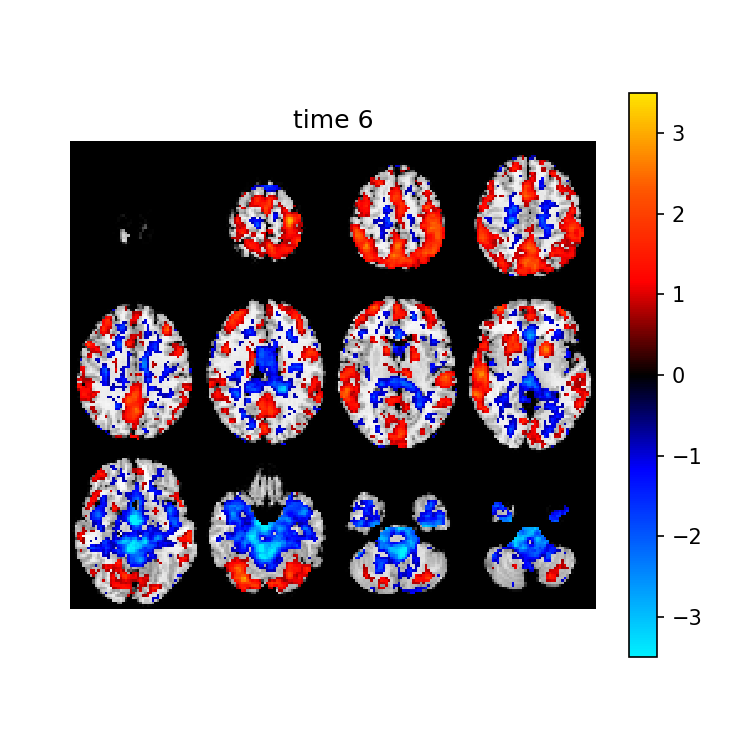

interactive(children=(IntSlider(value=6, description='i', max=13), IntSlider(value=0, description='r', max=1),…

In [31]:
comp_fig, comp_ax = plt.subplots(figsize=(5, 5))


@widgets.interact(i=(0,13), r=(0,1), threshold=(0.0, 3.0))
def update_plot(i, r, threshold):
    global comp_ax
    
    ims=comp_ax.images        
   
    for im in ims:
        cb=im.colorbar
        if cb is not None:
            cb.remove()
            
    comp_ax.clear() 
    comp_ax = create_fmri_factor_plot(
        B_images[r][...,i], 
        template, # The 3D brain template to plot the components onto
        cmap=base.maryland_cmap, # Which colourmap to use, can be any matplotlib colourmap

        num_tile_cols=4,  # Number of slice rows to use
        num_tile_rows=3,  # Number of slice columns to use
        slice_idx=slice_idx,  # Which slices to show
        # the length of slice_idx must be equal to num_tile_cols*num_tile_rows

        zscore=True, # Whether or not to z-score the components
        threshold=threshold,  # What threshold to use 
        vmin=-3.5, 
        vmax=3.5,
        ax=comp_ax
    )
    
    comp_ax.set_title(f'time {i}')
    comp_ax.axis('off')


For more information about the functions (for now, only all possible argument names), type the function name followed by a questionmark in an empty cell, like below. Arguments on the form `argument_name=value` are optional, and the value behind the equal sign is its default value.

In [ ]:
create_fmri_factor_plot?